<a href="https://colab.research.google.com/github/NimishaCodeLab/cnn_model_on_cifar10_dataset/blob/main/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.8.15


### load modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
tf.__version__

'2.9.2'

### load dataset

In [ ]:
(Xtrain,ytrain),(Xtest,ytest)=tf.keras.datasets.cifar10.load_data()
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape# color images

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
ytrain,ytest=ytrain.reshape(-1),ytest.reshape(-1)

print('Training data shape:',Xtrain.shape,'; of type:',Xtrain.dtype)
print('Training data labels:',ytrain.shape,'; of type:',ytrain.dtype)
print('Testing data shape:',Xtest.shape,'; of type:',Xtest.dtype)
print('Testing data labels:',ytest.shape,'; of type:',ytest.dtype)


print(f'Xtrain maximum value: {np.max(Xtrain)} and minimum value: {np.min(Xtrain)}')
print(f'Xtest maximum value: {np.max(Xtest)} and minimum value: {np.min(Xtest)}')
print(f'ytrain unique labels: {set(ytrain)}')
print(f'ytest unique labels: {set(ytest)}')

Training data shape: (50000, 32, 32, 3) ; of type: uint8
Training data labels: (50000,) ; of type: uint8
Testing data shape: (10000, 32, 32, 3) ; of type: uint8
Testing data labels: (10000,) ; of type: uint8
Xtrain maximum value: 255 and minimum value: 0
Xtest maximum value: 255 and minimum value: 0
ytrain unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
ytest unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


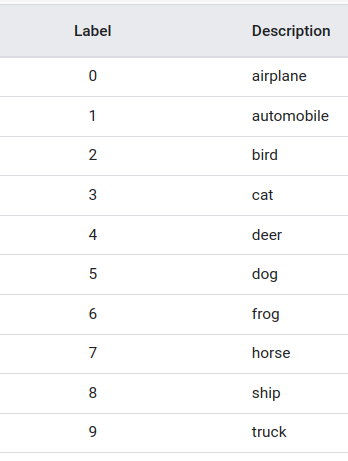

In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### plot data

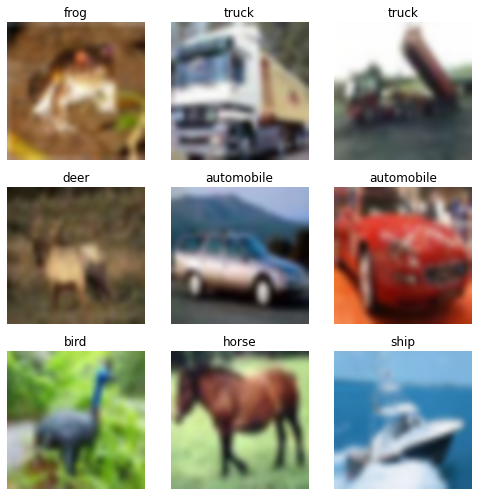

In [ ]:
plt.figure(figsize=(7,7))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(Xtrain[index],cmap='gray',interpolation='bicubic')
  plt.axis('off')
  plt.title(labels[ytrain[index]])

plt.tight_layout()
plt.show()

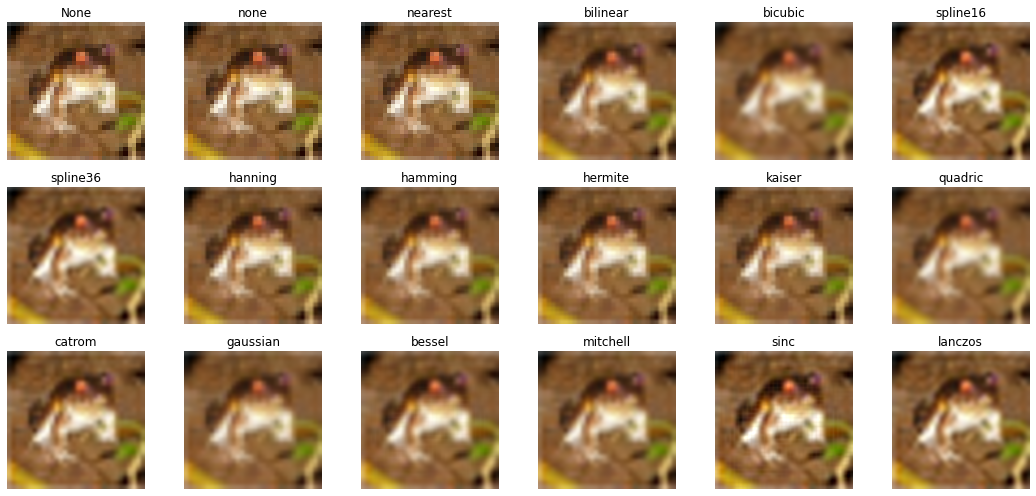

In [ ]:
interpolations=[None,'none','nearest','bilinear','bicubic','spline16','spline36','hanning',
                'hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell',
                'sinc','lanczos']


plt.figure(figsize=(15,7))
for index,interpolation in enumerate(interpolations):
  plt.subplot(3,6,index+1)
  plt.imshow(Xtrain[0],cmap='gray',interpolation=interpolation)
  plt.axis('off')
  plt.title(str(interpolation))
plt.tight_layout()
plt.show()

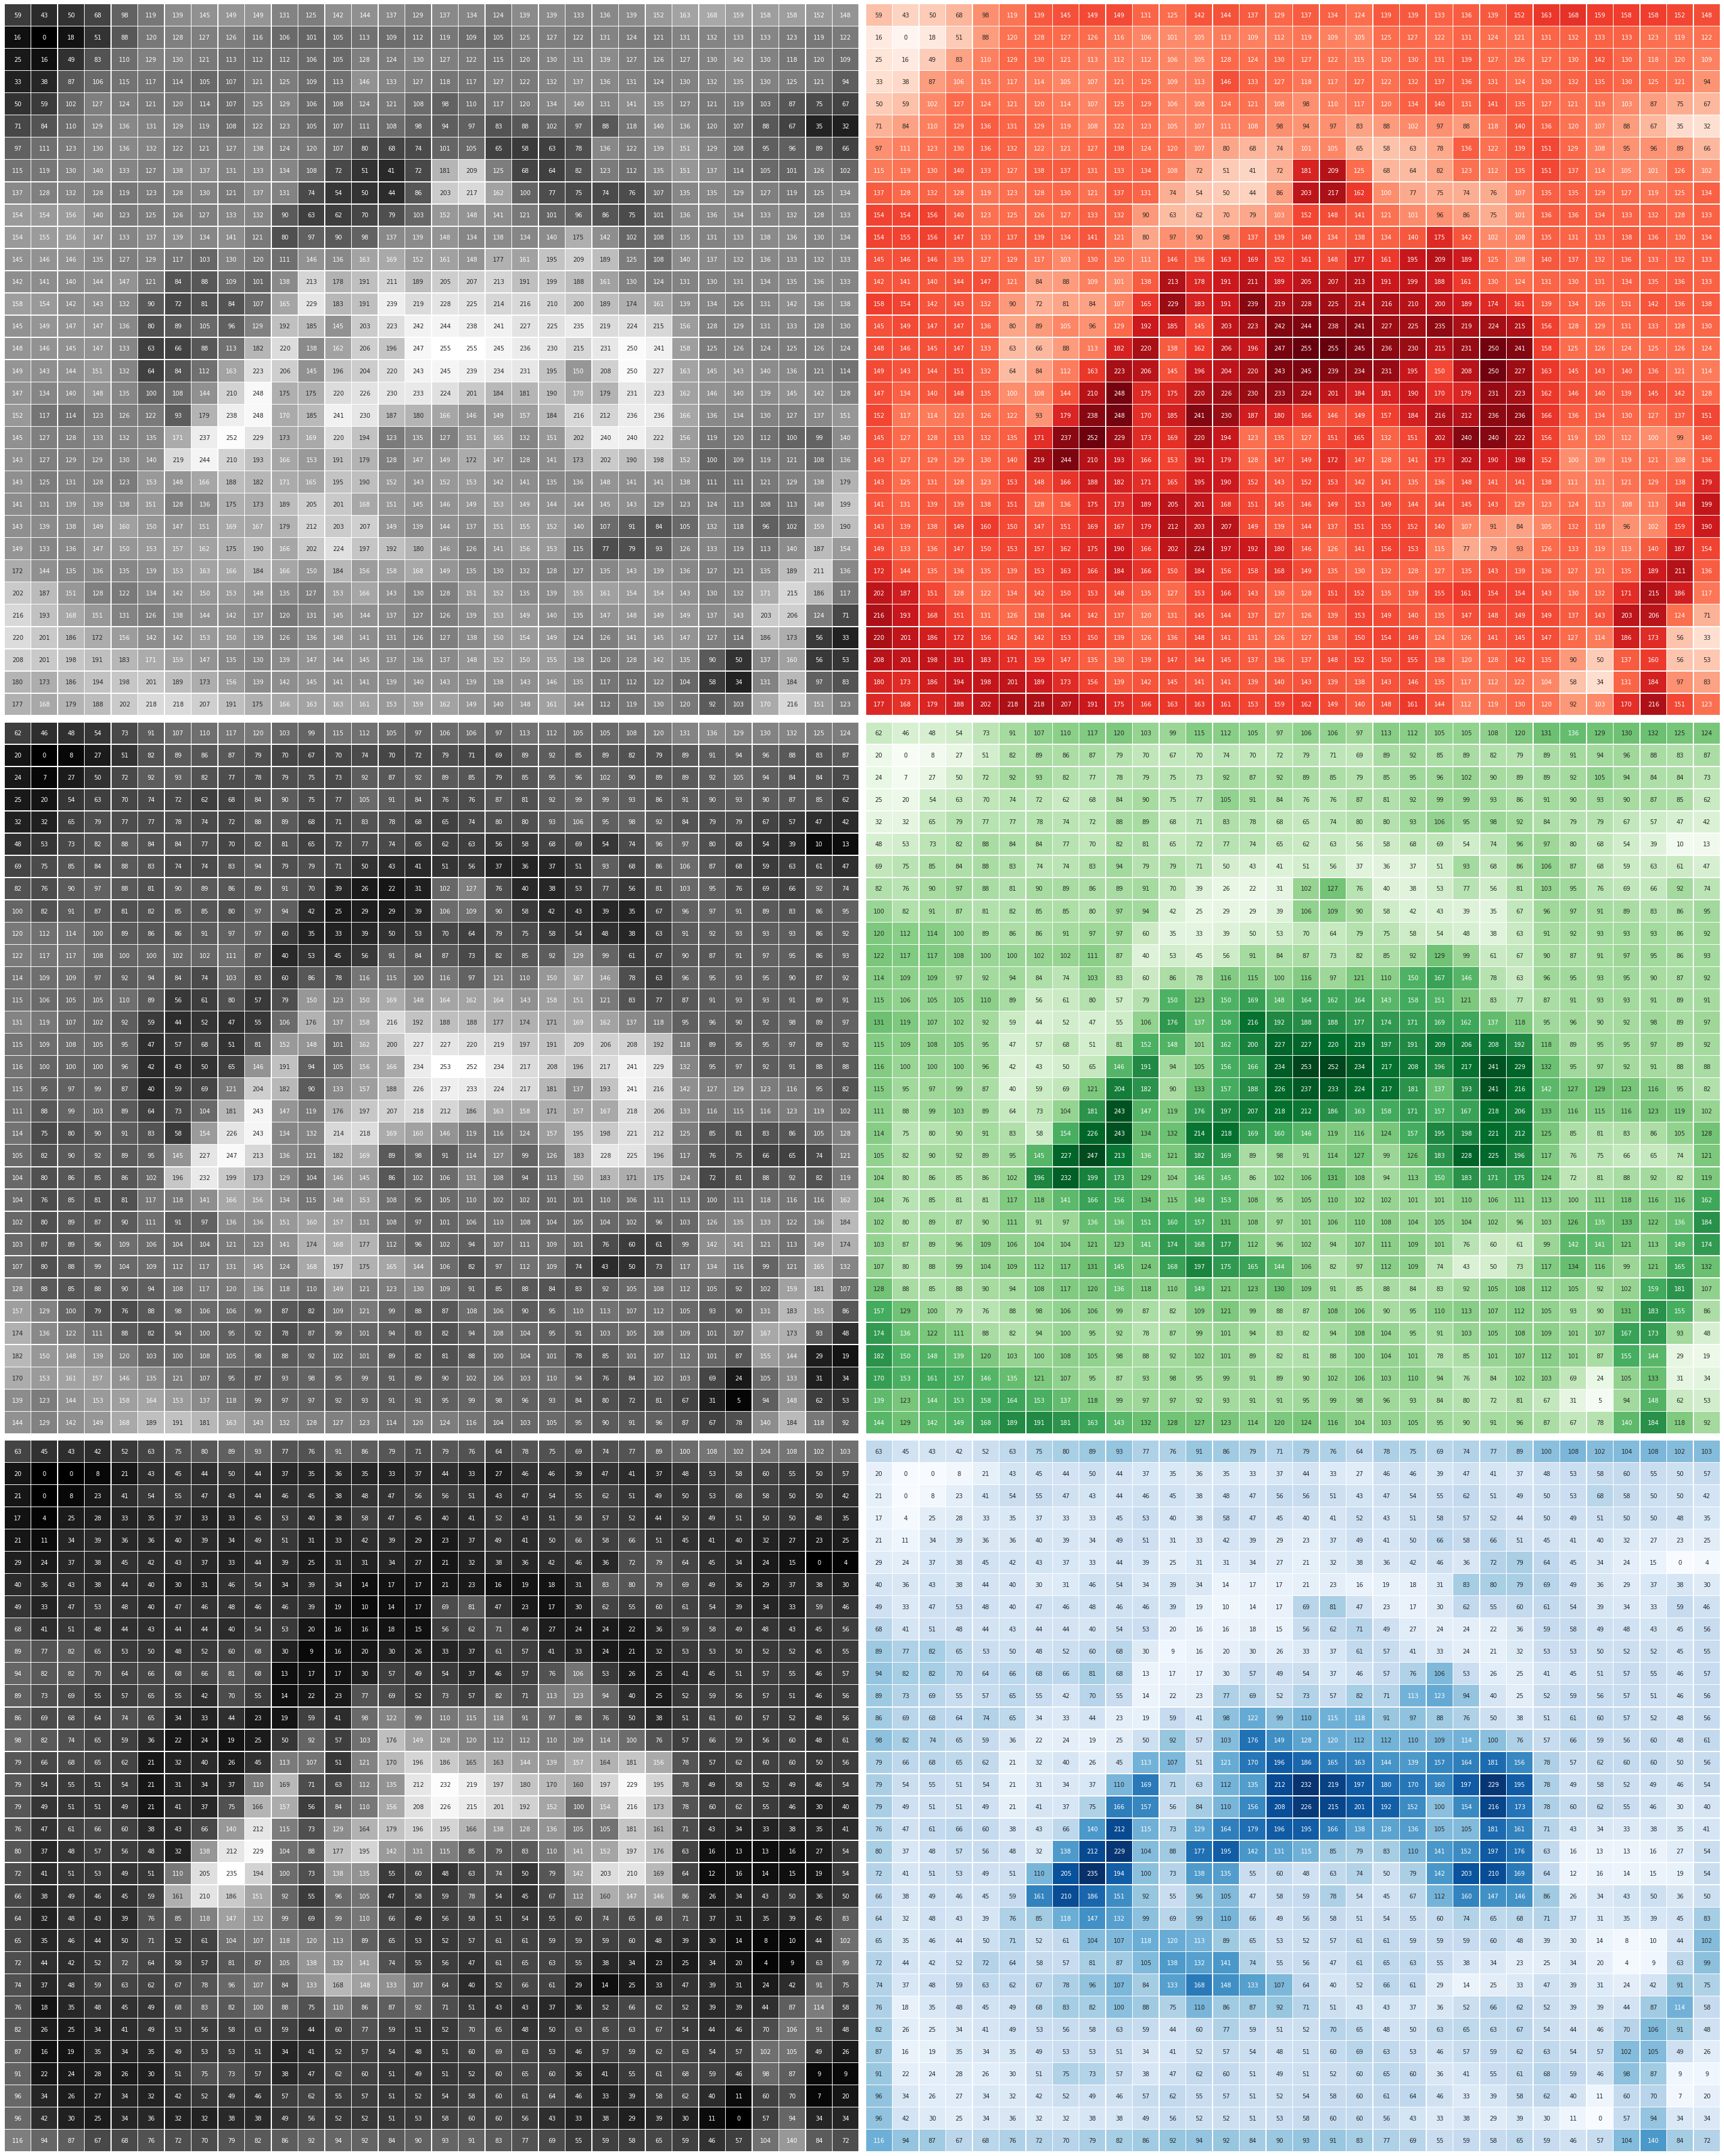

In [ ]:
plt.figure(figsize=(40,50))
for channel,color in enumerate(['gray','Reds','gray','Greens','gray','Blues']):
  plt.subplot(3,2,channel+1)
  sns.heatmap(Xtrain[0,:,:,channel//2],cmap=color,annot=True,linewidths=0.5,linecolor="white",cbar=False,fmt='g')
  plt.axis('off')
plt.tight_layout()
plt.savefig('pixel-values.png',dpi=None)
plt.show()

### pre-process dataset (scale pixels)

In [ ]:
# make images scale to 0 and 1
Xtrain_processed=(Xtrain / Xtrain.max()).astype(np.float32)
Xtest_processed=(Xtest / Xtest.max()).astype(np.float32)
print(f'Xtrain maximum value: {np.max(Xtrain_processed)} and minimum value: {np.min(Xtrain_processed)}',
      'data-type:',Xtrain_processed.dtype)
print(f'Xtest maximum value: {np.max(Xtest_processed)} and minimum value: {np.min(Xtest_processed)}',
      'data-type:',Xtest_processed.dtype)

Xtrain maximum value: 1.0 and minimum value: 0.0 data-type: float32
Xtest maximum value: 1.0 and minimum value: 0.0 data-type: float32


In [ ]:
model=tf.keras.Sequential(layers=None,name='cifar_clf')
model.add(tf.keras.layers.Convolution2D(32,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=Xtrain.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))

In [ ]:
model.summary()

Model: "cifar_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trainab

above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))# for 10 classes


model.summary()

Model: "cifar_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0 

**Compile the model:**

In [ ]:
model.compile(optimizer='rmsprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

**Feed the model:**

In [ ]:
history=model.fit(x=Xtrain_processed,y=ytrain,batch_size=None,epochs=10,verbose='auto',callbacks=None,validation_split=0.3,
                  validation_data=None,shuffle=True)

Epoch 1/10
1094/1094 [==============================] - 15s 6ms/step - loss: 1.6051 - accuracy: 0.4164 - val_loss: 1.3312 - val_accuracy: 0.5172
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2295 - accuracy: 0.5615 - val_loss: 1.1713 - val_accuracy: 0.5859
Epoch 3/10
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0588 - accuracy: 0.6298 - val_loss: 1.0798 - val_accuracy: 0.6358
Epoch 4/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9438 - accuracy: 0.6698 - val_loss: 0.9422 - val_accuracy: 0.6744
Epoch 5/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8480 - accuracy: 0.7046 - val_loss: 1.0185 - val_accuracy: 0.6493
Epoch 6/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7711 - accuracy: 0.7322 - val_loss: 0.9297 - val_accuracy: 0.6821
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7082 - accuracy: 0.7532 - val_loss: 0.9157 - val_accuracy

### see model history

In [ ]:
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,1.605130,0.416429,1.331219,0.517200
1,1.229548,0.561486,1.171293,0.585933
2,1.058808,0.629800,1.079833,0.635800
3,0.943802,0.669800,0.942156,0.674400
4,0.847957,0.704571,1.018468,0.649333


In [ ]:
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
5,0.771086,0.732229,0.929685,0.682067
6,0.708181,0.753200,0.915669,0.693600
7,0.646972,0.776286,0.953354,0.699800
8,0.594688,0.792657,0.969178,0.690867
9,0.546143,0.808457,1.047267,0.678267


### plot model history

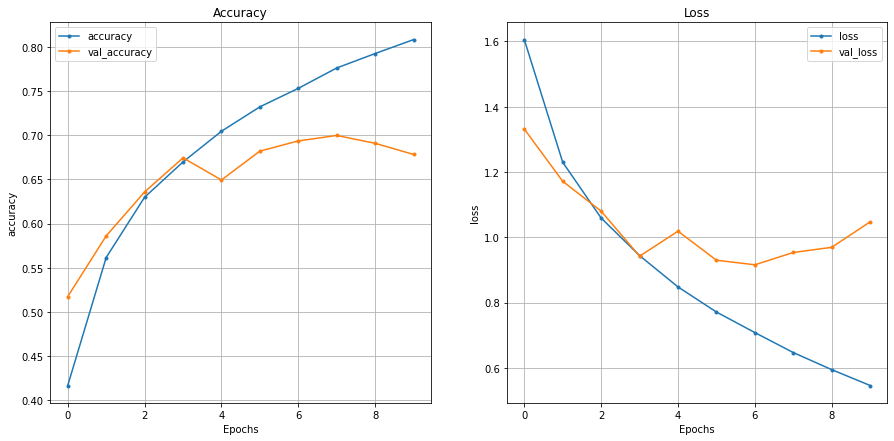

In [ ]:

plt.figure(figsize=(15,7))


plt.subplot(1,2,1)
pd.DataFrame(history.history)['accuracy'].plot(marker='.')
pd.DataFrame(history.history)['val_accuracy'].plot(marker='.')
plt.title('Accuracy'),plt.xlabel('Epochs'),plt.ylabel('accuracy')
plt.grid(),plt.legend()
plt.subplot(1,2,2)

pd.DataFrame(history.history)['loss'].plot(marker='.')
pd.DataFrame(history.history)['val_loss'].plot(marker='.')

plt.title('Loss'),plt.xlabel('Epochs'),plt.ylabel('loss')
plt.grid(),plt.legend()
plt.show()

### evaluate model

Evaluate accuracy: Next, compare how the model performs on the test dataset.

In [ ]:
loss,accuracy=model.evaluate(x=Xtest_processed,y=ytest,batch_size=None,verbose='auto')
print(f'Model testing accuracy: {accuracy}; and loss: {loss}')

313/313 [==============================] - 1s 3ms/step - loss: 1.0630 - accuracy: 0.6757
Model testing accuracy: 0.6757000088691711; and loss: 1.062992811203003


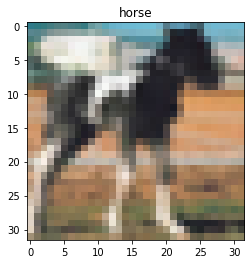

In [ ]:

random_index=np.random.choice(range(Xtest.shape[0]))
plt.imshow(Xtest[random_index])
plt.title(labels[ytest[random_index]])
plt.show()

In [ ]:
probabilities=model.predict(Xtest[[random_index]])
print('Model prediction prbabilities:',probabilities)
print('I think this is a image of',labels[np.argmax(probabilities)])

1/1 [==============================] - 0s 143ms/step
Model prediction prbabilities: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
I think this is a image of dog


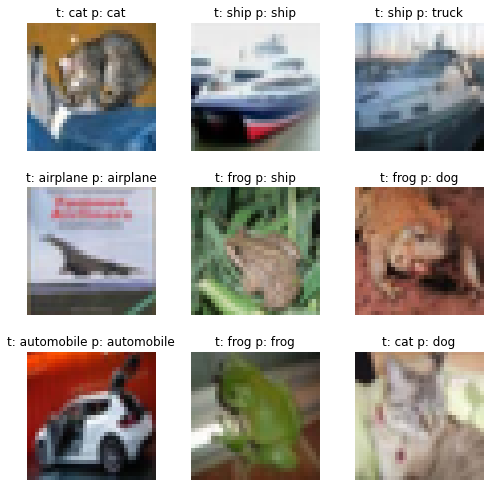

In [ ]:
plt.figure(figsize=(7,7))
for index in range(9):
  plt.subplot(3,3,index+1)
  plt.imshow(Xtest[index],cmap='gray')
  plt.axis('off')
  prediction=np.argmax(model(Xtest[[index]]))
  plt.title('t: '+str(labels[ytest[index]])+' p: '+str(labels[prediction]))
plt.tight_layout()
plt.show()

### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
ypredictions=np.argmax(model(Xtest),axis=1)
confusion_matrix(ytest,ypredictions,labels=range(10))

array([[843,  34,  19,   1,   1,   2,   2,   6,  32,  60],
       [ 40, 801,   0,   1,   1,   2,   1,   0,  16, 138],
       [239,  48, 367,  26,   8,  99,  17,  59,  27, 110],
       [183,  63,  58, 118,   5, 250,  12,  93,  56, 162],
       [257,  52,  99,  23,  77, 155,  23, 167,  30, 117],
       [100,  19,  55,  35,   1, 540,   5,  97,  33, 115],
       [163, 115,  74,  28,   3,  79, 275,  48,  50, 165],
       [ 79,  33,  24,   6,   1,  61,   0, 638,   7, 151],
       [224,  43,   2,   1,   0,   1,   0,   2, 631,  96],
       [ 63, 108,   4,   0,   0,   0,   0,   5,  10, 810]])

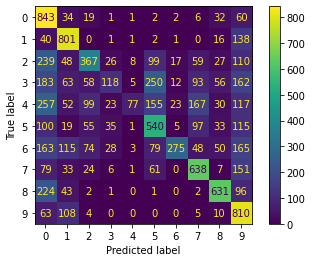

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix(ytest,ypredictions,labels=range(10)))
display.plot()
plt.show()

### make prediction using global image

In [ ]:
import cv2 as vision
image=vision.imread('untitled.png',vision.IMREAD_GRAYSCALE)
image=vision.resize(image,(28,28))
image_scaled=(image/image.max()).astype(np.float32)
probabilities=model(np.expand_dims(image_scaled,axis=0))
print('probabilities:',probabilities)
# --------------------------------------------------------------
plt.imshow(image_scaled,cmap='gray')
plt.title('I think image is of '+str(np.argmax(probabilities)))
plt.show()

# References

* https://www.cs.toronto.edu/~kriz/cifar.html
* Source: https://www.tensorflow.org/tutorials/images/cnn
* Training a neural network on MNIST with Keras - https://www.tensorflow.org/datasets/keras_example
* Dataset - [tf.keras.datasets.cifar10.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)
* Dataset (from tensorflow-dataset - https://www.tensorflow.org/datasets/catalog/cifar10)
* Image classification - https://www.tensorflow.org/tutorials/images/classification

If the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

* [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

